In [1]:
import streamlit as st

import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import datetime

import plotly.offline as pyo

from datetime import time,datetime,date
from PIL import Image


import plotly.offline as py 
from plotly.figure_factory import create_table # for creating nice table

import matplotlib as mpl

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
from plotly.offline import init_notebook_mode, iplot

In [77]:
df = pd.read_csv("Employee_Reimbursements_Through_Payroll_System.csv")
df.rename(columns = {'Pay Date':'Pay_Date',
                      'Employee Name': 'Employee_Name',
                      'Reimbursement Type': 'Reimbursement_Type',
                      'Department Name': 'Department_Name',
                      'Job Title':'Job_Title'}, inplace = True)

df['Pay_Date'] = pd.to_datetime(df['Pay_Date'], format= '%m/%d/%Y')
df['Year']=pd.to_datetime(pd.DatetimeIndex(df['Pay_Date']).year, format='%Y')
df['Year_Only'] = df['Year'].dt.strftime('%Y')
df['Month']=df['Pay_Date'].dt.strftime('%b')
df['Month_Year']=df['Pay_Date'].dt.strftime('%Y-%m')
df['Month_Year'] = pd.to_datetime(df['Month_Year'], format= '%Y-%m')
df['Department_Name'] = df['Department_Name'].str.lower()
df['Job_Title'] = df['Job_Title'].str.lower()
df['Year'] = df['Pay_Date'].dt.strftime('%Y')

In [76]:
df.head()

,Pay_Date,Employee_Name,Amount,Reimbursement_Type,Department_Name,Job_Title,Year,Year_Only,Month,Month_Year
0,2005-07-01,"ABREU, DARBIS",172.53,MILEAGE,DEPARTMENT OF WATER MANAGEMENT,HYDRANT INSPECTOR,2005-01-01,2005,Jul,2005-07-01
1,2005-07-01,"ACOSTA, SEGUNDINO",250.00,MILEAGE,DEPT OF STREETS & SANITATION,REFUSE COLLECTION COORD,2005-01-01,2005,Jul,2005-07-01
2,2005-07-01,"ADDESSO JR, FRANK J",250.00,MILEAGE,DEPT OF STREETS & SANITATION,MOTOR TRUCK DRIVER,2005-01-01,2005,Jul,2005-07-01
3,2005-07-01,"ADDISON, RAYMOND",250.00,MILEAGE,DEPT OF STREETS & SANITATION,LABORER,2005-01-01,2005,Jul,2005-07-01
4,2005-07-01,"ADEBAYO, BENJAMIN B",218.30,MILEAGE,DEPARTMENT OF BUILDINGS,BUILDING INSPECTOR,2005-01-01,2005,Jul,2005-07-01


In [4]:
df_monthyear = df.groupby(['Month_Year','Year','Month','Employee_Name','Reimbursement_Type', 'Department_Name', 'Job_Title']).sum().reset_index()
df_monthyear_s = df.groupby(['Month_Year','Year','Month','Reimbursement_Type', 'Department_Name', 'Job_Title']).sum('Amount').reset_index()

df_year_s = df.groupby(['Year','Reimbursement_Type', 'Department_Name', 'Job_Title']).sum('Amount').reset_index()

In [5]:
df.head(5)

,Pay_Date,Employee_Name,Amount,Reimbursement_Type,Department_Name,Job_Title,Year,Month,Month_Year
0,2005-07-01,"ABREU, DARBIS",172.53,MILEAGE,DEPARTMENT OF WATER MANAGEMENT,HYDRANT INSPECTOR,2005-01-01,Jul,2005-07-01
1,2005-07-01,"ACOSTA, SEGUNDINO",250.00,MILEAGE,DEPT OF STREETS & SANITATION,REFUSE COLLECTION COORD,2005-01-01,Jul,2005-07-01
2,2005-07-01,"ADDESSO JR, FRANK J",250.00,MILEAGE,DEPT OF STREETS & SANITATION,MOTOR TRUCK DRIVER,2005-01-01,Jul,2005-07-01
3,2005-07-01,"ADDISON, RAYMOND",250.00,MILEAGE,DEPT OF STREETS & SANITATION,LABORER,2005-01-01,Jul,2005-07-01
4,2005-07-01,"ADEBAYO, BENJAMIN B",218.30,MILEAGE,DEPARTMENT OF BUILDINGS,BUILDING INSPECTOR,2005-01-01,Jul,2005-07-01


In [6]:
df.dtypes

Pay_Date              datetime64[ns]
Employee_Name                 object
Amount                       float64
Reimbursement_Type            object
Department_Name               object
Job_Title                     object
Year                  datetime64[ns]
Month                         object
Month_Year            datetime64[ns]
dtype: object

In [7]:
df.describe() #dataframe has negative values

,Amount
count,83983.000000
mean,240.639048
std,133.244072
min,-700.000000
25%,139.730000
50%,238.650000
75%,335.220000
max,3137.000000


In [8]:
#number of unique values in the dataset
df.nunique()
#df['Pay Date'].unique() #Date range is from 2005 to 2021. Only has values from the 1st and 16th of each month

Pay_Date                356
Employee_Name          2107
Amount                16076
Reimbursement_Type        2
Department_Name          30
Job_Title               335
Year                     17
Month                    12
Month_Year              190
dtype: int64

<AxesSubplot:>

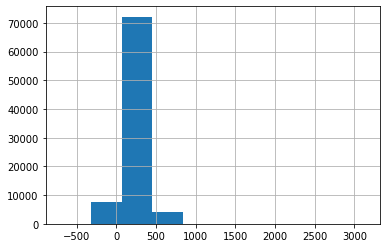

In [9]:
df['Amount'].hist() #values is skewed

In [10]:
print(df.isnull().sum()) # no null values

Pay_Date              0
Employee_Name         0
Amount                0
Reimbursement_Type    0
Department_Name       0
Job_Title             0
Year                  0
Month                 0
Month_Year            0
dtype: int64


In [11]:
df.groupby('Reimbursement_Type').sum()

,Amount
Reimbursement_Type,
MILEAGE,20192943.06
MILEAGE PRIOR PERIOD,16646.13


In [12]:
df.groupby('Department_Name').sum().sort_values('Amount', ascending = False).head(10)

,Amount
Department_Name,
DEPARTMENT OF BUILDINGS,4188879.60
CHICAGO DEPARTMENT OF TRANSPORTATION,3111107.83
DEPARTMENT OF WATER MANAGEMENT,2670767.56
DEPT OF STREETS & SANITATION,2303613.00
FIRE DEPARTMENT,2040439.32
OFFICE OF EMERGENCY COMMUNICATION,1775696.14
DEPARTMENT OF HEALTH,1687946.47
DEPT OF ASSETS INFORMATION AND SERVICES,965391.64
CITY CLERK,322496.95


In [13]:
df.groupby('Employee_Name').sum().sort_values('Amount', ascending = False).head(10)

,Amount
Employee_Name,
"PERINO, PAUL C",79489.70
"WILLIAMSON, RICKY",77806.21
"WILLIAMS III, ERNEST",72002.67
"WILKINS, ANTHONY H",71478.23
"O CONNOR, MICHAEL J",71179.40
"HENDERSON, DENNIS R",70244.34
"WORRILL, OSCAR W",69064.56
"BRUNO, KEVIN P",67303.64
"BOWBIN, ROBERT J",66176.93


In [14]:
df.groupby('Employee_Name').sum().sort_values('Amount', ascending = True).head(10)#lot of people have zero Amount

,Amount
Employee_Name,
"THOMAS, HATTIE",0.0
"TANKSON, EVELYN",0.0
"JONES, VALERIE",0.0
"JANTKE, RACHEL LYNN",0.0
"GRUJICIC, MIRJANA E",0.0
"DICKENS, JASON",0.0
"GARCIA, NILDA",0.0
"PAGAN, LILLYBETH",0.0
"RODRIGUEZ, NADINE R",0.0


In [15]:
df.groupby('Job_Title').sum().sort_values('Amount', ascending = False).head(10)

,Amount
Job_Title,
BUILDING/CONSTRUCTION INSPECTOR,2503218.86
LINEMAN,1707421.29
PLUMBING INSPECTOR,1248208.98
TRAFFIC SIGNAL REPAIRMAN,1183685.28
FIELD SERVICE SPECIALIST II,1000418.68
FIREFIGHTER,644658.73
WATER RATE TAKER,591522.35
SANITARIAN II,572578.19
ELECTRICAL INSPECTOR,527349.76


In [16]:
df.shape

(83983, 9)

In [17]:
df_monthyear.shape

(82969, 8)

In [18]:
df_monthyear_s.shape

(17840, 7)

In [19]:
df_monthyear_s.head()

,Month_Year,Year,Month,Reimbursement_Type,Department_Name,Job_Title,Amount
0,2005-07-01,2005-01-01,Jul,MILEAGE,BOARD OF ELECTION COMMISSIONER,CLERK - BD OF ELECTIONS,91.94
1,2005-07-01,2005-01-01,Jul,MILEAGE,BOARD OF ELECTION COMMISSIONER,INVESTIGATOR I-ELECTIONS,161.60
2,2005-07-01,2005-01-01,Jul,MILEAGE,BOARD OF ELECTION COMMISSIONER,PRINCIPAL CLERK-ELECTIONS,119.48
3,2005-07-01,2005-01-01,Jul,MILEAGE,BOARD OF ELECTION COMMISSIONER,SENIOR CLERK-ELECTIONS,161.60
4,2005-07-01,2005-01-01,Jul,MILEAGE,CHICAGO DEPARTMENT OF TRANSPORTATION,CIVIL ENGINEER II,250.00


In [20]:
df_monthyear_s[:5]['Department_Name']

0          BOARD OF ELECTION COMMISSIONER
1          BOARD OF ELECTION COMMISSIONER
2          BOARD OF ELECTION COMMISSIONER
3          BOARD OF ELECTION COMMISSIONER
4    CHICAGO DEPARTMENT OF TRANSPORTATION
Name: Department_Name, dtype: object

In [21]:
fig = go.Figure(
   data=[
       go.Bar(
           x=df_year_s['Year'],
           y=df_year_s['Amount']
       )
   ],
   layout=go.Layout(
       title='Total Yearly Cost'
   )
)
#pyo.plot(fig)
fig.update_traces(marker_line_width=0)
fig.show()

In [22]:
fig = go.Figure(
   data=[
       go.Bar(
           x=df_monthyear_s['Month_Year'],
           y=df_monthyear_s['Amount']
       )
   ],
   layout=go.Layout(
       title='Total Month Year Cost'
   )
)
#pyo.plot(fig)
fig.update_traces(marker_line_width=0)
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [23]:
df_monthyear_s[['Month_Year', 'Amount']]

,Month_Year,Amount
0,2005-07-01,91.94
1,2005-07-01,161.60
2,2005-07-01,119.48
3,2005-07-01,161.60
4,2005-07-01,250.00
...,...,...
17835,2021-04-01,71.68
17836,2021-04-01,341.04
17837,2021-04-01,180.32
17838,2021-04-01,201.60


In [24]:
fig = go.Figure(
   data=[
       go.Bar(
           x=df_monthyear_s['Month'],
           y=df_year_s['Amount']
       )
   ],
   layout=go.Layout(
       title='Total Monthly Trends'
   )
)
#pyo.plot(fig)
fig.update_traces(marker_line_width=0)
fig.show()

In [38]:
fig = go.Figure(
   data=[
       go.Bar(
           y=df_year_s['Department_Name'],
           x=df_year_s['Amount'],
           orientation = 'h'
       )
   ],
   layout=go.Layout(
       title='Department Name'
   )
)
#pyo.plot(fig)
fig.update_traces(marker_line_width=0)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [39]:
fig = px.bar(df_year_s, x="Year", y="Amount", color="Department_Name", barmode = 'stack')

fig.update_traces(marker_line_width=0)
fig.show()

In [92]:
fig = px.bar(df_year_s, x="Year", y="Amount", color="Job_Title", barmode = 'stack')

fig.update_traces(marker_line_width=0) 

fig.update_layout(legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1), legend_title_text = '')
        
fig.show()



In [41]:
fig = go.Figure(
       go.Bar(
           y=df_year_s['Job_Title'],
           x=df_year_s['Amount'],
           orientation='h'
       ),
   layout=go.Layout(
       title='Job Title'
   )
)
#pyo.plot(fig)
#fig.update_traces(marker_line_width=0)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [120]:
type(df_year_s['Department_Name'].unique())

numpy.ndarray

In [141]:
df_year_s['Department_Name'] = df_year_s['Department_Name'].str.lower()

In [142]:
df_year_s.groupby(['Department_Name']).sum().reset_index().sort_values(by = 'Amount', ascending = False)

,Department_Name,Amount
5,department of buildings,4188879.60
1,chicago department of transportation,3111107.83
11,department of water management,2670767.56
23,dept of streets & sanitation,2303613.00
25,fire department,2040439.32
26,office of emergency communication,1775696.14
8,department of health,1687946.47
13,dept of assets information and services,965391.64
2,city clerk,322496.95
3,city council,176930.06


In [143]:
df_year_s['Job_Title'] = df_year_s['Job_Title'].str.lower()

In [144]:
df_year_s.groupby(['Job_Title']).sum().reset_index().sort_values(by = 'Amount', ascending = False).head(10)

,Job_Title,Amount
48,building/construction inspector,2503218.86
196,lineman,1707421.29
227,plumbing inspector,1248208.98
320,traffic signal repairman,1183685.28
126,field service specialist ii,1000418.68
138,firefighter,644658.73
332,water rate taker,591522.35
269,sanitarian ii,572578.19
112,electrical inspector,527349.76
191,lieutenant,365742.56


In [139]:
df_year_s['Job_Title'].unique()

array(['clerk - bd of elections', 'investigator i-elections',
       'principal clerk-elections', 'senior clerk-elections',
       'asphalt helper', 'civil engineer ii', 'civil engineer iii',
       'civil engineer iv', 'engineering technician iv',
       'engineering technician v', 'engineering technician vi',
       'field service specialist ii', 'field service specialist iii',
       'field supvsr', 'foreman of bridge and structural iron workers',
       'foreman of carpenters', 'foreman of cement finishers',
       'general foreman of carpenters',
       'general foreman of construction laborers',
       'general foreman of hoisting engineers', 'machinist (sub-foreman)',
       'plumber', 'senior city forester', 'traffic engineer iii',
       'administrative asst iii', 'asst dir', 'legislative asst ii',
       'project coord', 'supervising investigator',
       'supvsr of license issuance', 'investigator', 'legislative aide',
       'administrative services officer ii',
       'ass

In [ ]:
filter_list = ['Crime', 'Drama', 'Action']
movies[movies.genre.isin(filter_list)]

In [85]:
df_year_s.columns

Index(['Year', 'Reimbursement_Type', 'Department_Name', 'Job_Title', 'Amount'], dtype='object')

In [86]:
df_year_s[df_year_s.Department_Name.isin(['BOARD OF ELECTION COMMISSIONER'])]

,Year,Reimbursement_Type,Department_Name,Job_Title,Amount
0,2005-01-01,MILEAGE,BOARD OF ELECTION COMMISSIONER,CLERK - BD OF ELECTIONS,2021.28
1,2005-01-01,MILEAGE,BOARD OF ELECTION COMMISSIONER,INVESTIGATOR I-ELECTIONS,751.08
2,2005-01-01,MILEAGE,BOARD OF ELECTION COMMISSIONER,PRINCIPAL CLERK-ELECTIONS,622.68
3,2005-01-01,MILEAGE,BOARD OF ELECTION COMMISSIONER,SENIOR CLERK-ELECTIONS,893.42
296,2006-01-01,MILEAGE,BOARD OF ELECTION COMMISSIONER,CLERK - BD OF ELECTIONS,4017.44
297,2006-01-01,MILEAGE,BOARD OF ELECTION COMMISSIONER,INVESTIGATOR I-ELECTIONS,1524.90
298,2006-01-01,MILEAGE,BOARD OF ELECTION COMMISSIONER,PRINCIPAL CLERK-ELECTIONS,2319.14
299,2006-01-01,MILEAGE,BOARD OF ELECTION COMMISSIONER,SENIOR CLERK-ELECTIONS,1595.49
548,2007-01-01,MILEAGE,BOARD OF ELECTION COMMISSIONER,CLERK - BD OF ELECTIONS,3417.68
549,2007-01-01,MILEAGE,BOARD OF ELECTION COMMISSIONER,INVESTIGATOR I-ELECTIONS,1848.44


In [47]:
df['Department_Name'].head(500)

0            DEPARTMENT OF WATER MANAGEMENT
1              DEPT OF STREETS & SANITATION
2              DEPT OF STREETS & SANITATION
3              DEPT OF STREETS & SANITATION
4                   DEPARTMENT OF BUILDINGS
                       ...                 
495            DEPT OF STREETS & SANITATION
496    CHICAGO DEPARTMENT OF TRANSPORTATION
497                         FIRE DEPARTMENT
498    CHICAGO DEPARTMENT OF TRANSPORTATION
499            DEPT OF STREETS & SANITATION
Name: Department_Name, Length: 500, dtype: object

In [63]:
df_year_s['Year'].dt.strftime('%Y').unique()

array(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'], dtype=object)

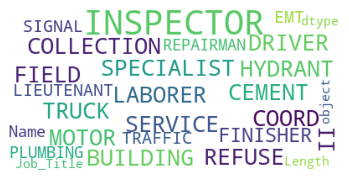

<Figure size 432x288 with 0 Axes>

In [61]:
#mpl.rcParams['font.size']=12                
#mpl.rcParams['savefig.dpi']=100             
#mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)


wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['Job_Title']))

#print(wordcloud)
#fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
fig = plt.figure()
#plt.show()
#fig.savefig("word1.png", dpi=900)
#st.pyplot(fig, use_container_width=True)

In [53]:
fig=go.Figure(
        go.Histogram2dContour(x=df['Department_Name'].head(500), 
                                y=df['Amount'].head(500), 
                                contours=go.Contours(coloring='heatmap')))

fig.add_traces(go.Scatter(
    x=df['Department_Name'].head(1000), 
    y=df['Amount'].head(1000),
    mode='markers'))

py.iplot(fig, filename='histogram_subplots.png')
fig.show()

/Users/priankaball/Desktop/Data Visualization/dataviz/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:204: DeprecationWarning:

plotly.graph_objs.Contours is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.contour.Contours
  - plotly.graph_objs.surface.Contours
  - etc.




In [ ]:
fig = go.Figure(
       go.Bar(
           y=df_year_s['Job_Title'],
           x=df_year_s['Amount'],
           orientation='h'
       ),
   layout=go.Layout(
       title='Job Title'
   )
)
#pyo.plot(fig)
#fig.update_traces(marker_line_width=0)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [66]:
    df['Pay_Date_test'] = pd.to_datetime(df['Pay_Date'], format= '%m/%d/%Y')
    #df['Year']=pd.to_datetime(pd.DatetimeIndex(df['Pay_Date']).year, format='%Y')
    df['Year_test'] = df['Pay_Date_test'].dt.strftime('%Y')
    df.head()

,Pay_Date,Employee_Name,Amount,Reimbursement_Type,Department_Name,Job_Title,Year,Month,Month_Year,Pay_Date_test,Year_test
0,2005-07-01,"ABREU, DARBIS",172.53,MILEAGE,DEPARTMENT OF WATER MANAGEMENT,HYDRANT INSPECTOR,2005-01-01,Jul,2005-07-01,2005-07-01,2005
1,2005-07-01,"ACOSTA, SEGUNDINO",250.00,MILEAGE,DEPT OF STREETS & SANITATION,REFUSE COLLECTION COORD,2005-01-01,Jul,2005-07-01,2005-07-01,2005
2,2005-07-01,"ADDESSO JR, FRANK J",250.00,MILEAGE,DEPT OF STREETS & SANITATION,MOTOR TRUCK DRIVER,2005-01-01,Jul,2005-07-01,2005-07-01,2005
3,2005-07-01,"ADDISON, RAYMOND",250.00,MILEAGE,DEPT OF STREETS & SANITATION,LABORER,2005-01-01,Jul,2005-07-01,2005-07-01,2005
4,2005-07-01,"ADEBAYO, BENJAMIN B",218.30,MILEAGE,DEPARTMENT OF BUILDINGS,BUILDING INSPECTOR,2005-01-01,Jul,2005-07-01,2005-07-01,2005


In [64]:
df['Pay_Date'].dt.strftime('%Y')

0        2005
1        2005
2        2005
3        2005
4        2005
         ... 
83978    2021
83979    2021
83980    2021
83981    2021
83982    2021
Name: Pay_Date, Length: 83983, dtype: object

In [65]:
pd.to_datetime(df['Pay_Date'], format= '%m/%d/%Y')

0       2005-07-01
1       2005-07-01
2       2005-07-01
3       2005-07-01
4       2005-07-01
           ...    
83978   2021-04-01
83979   2021-04-01
83980   2021-04-16
83981   2021-04-01
83982   2021-04-01
Name: Pay_Date, Length: 83983, dtype: datetime64[ns]

In [71]:
df.loc[df["Job_Title"] == 'HYDRANT INSPECTOR'].head()

,Pay_Date,Employee_Name,Amount,Reimbursement_Type,Department_Name,Job_Title,Year,Month,Month_Year,Pay_Date_test,Year_test
0,2005-07-01,"ABREU, DARBIS",172.53,MILEAGE,DEPARTMENT OF WATER MANAGEMENT,HYDRANT INSPECTOR,2005-01-01,Jul,2005-07-01,2005-07-01,2005
77,2005-07-01,"BUJANSKI, THOMAS J",250.00,MILEAGE,DEPARTMENT OF WATER MANAGEMENT,HYDRANT INSPECTOR,2005-01-01,Jul,2005-07-01,2005-07-01,2005
700,2005-08-01,"ABREU, DARBIS",250.00,MILEAGE,DEPARTMENT OF WATER MANAGEMENT,HYDRANT INSPECTOR,2005-01-01,Aug,2005-08-01,2005-08-01,2005
771,2005-08-01,"BUJANSKI, THOMAS J",250.00,MILEAGE,DEPARTMENT OF WATER MANAGEMENT,HYDRANT INSPECTOR,2005-01-01,Aug,2005-08-01,2005-08-01,2005
1365,2005-08-16,"ABREU, DARBIS",0.00,MILEAGE,DEPARTMENT OF WATER MANAGEMENT,HYDRANT INSPECTOR,2005-01-01,Aug,2005-08-01,2005-08-16,2005
1375,2005-08-16,"BUJANSKI, THOMAS J",0.00,MILEAGE,DEPARTMENT OF WATER MANAGEMENT,HYDRANT INSPECTOR,2005-01-01,Aug,2005-08-01,2005-08-16,2005
2108,2005-10-01,"ABREU, DARBIS",250.00,MILEAGE,DEPARTMENT OF WATER MANAGEMENT,HYDRANT INSPECTOR,2005-01-01,Oct,2005-10-01,2005-10-01,2005
2190,2005-10-01,"BUJANSKI, THOMAS J",250.00,MILEAGE,DEPARTMENT OF WATER MANAGEMENT,HYDRANT INSPECTOR,2005-01-01,Oct,2005-10-01,2005-10-01,2005
2921,2005-11-01,"ABREU, DARBIS",250.00,MILEAGE,DEPARTMENT OF WATER MANAGEMENT,HYDRANT INSPECTOR,2005-01-01,Nov,2005-11-01,2005-11-01,2005
2996,2005-11-01,"BUJANSKI, THOMAS J",250.00,MILEAGE,DEPARTMENT OF WATER MANAGEMENT,HYDRANT INSPECTOR,2005-01-01,Nov,2005-11-01,2005-11-01,2005


In [70]:
df

,Pay_Date,Employee_Name,Amount,Reimbursement_Type,Department_Name,Job_Title,Year,Month,Month_Year,Pay_Date_test,Year_test
0,2005-07-01,"ABREU, DARBIS",172.53,MILEAGE,DEPARTMENT OF WATER MANAGEMENT,HYDRANT INSPECTOR,2005-01-01,Jul,2005-07-01,2005-07-01,2005
1,2005-07-01,"ACOSTA, SEGUNDINO",250.00,MILEAGE,DEPT OF STREETS & SANITATION,REFUSE COLLECTION COORD,2005-01-01,Jul,2005-07-01,2005-07-01,2005
2,2005-07-01,"ADDESSO JR, FRANK J",250.00,MILEAGE,DEPT OF STREETS & SANITATION,MOTOR TRUCK DRIVER,2005-01-01,Jul,2005-07-01,2005-07-01,2005
3,2005-07-01,"ADDISON, RAYMOND",250.00,MILEAGE,DEPT OF STREETS & SANITATION,LABORER,2005-01-01,Jul,2005-07-01,2005-07-01,2005
4,2005-07-01,"ADEBAYO, BENJAMIN B",218.30,MILEAGE,DEPARTMENT OF BUILDINGS,BUILDING INSPECTOR,2005-01-01,Jul,2005-07-01,2005-07-01,2005
...,...,...,...,...,...,...,...,...,...,...,...
83978,2021-04-01,"MULAC, IVAN F",334.32,MILEAGE,CHICAGO DEPARTMENT OF TRANSPORTATION,FIELD SERVICE SPECIALIST II,2021-01-01,Apr,2021-04-01,2021-04-01,2021
83979,2021-04-01,"ALLEGRINI, NICK",53.76,MILEAGE,CHICAGO DEPARTMENT OF TRANSPORTATION,CEMENT FINISHER,2021-01-01,Apr,2021-04-01,2021-04-01,2021
83980,2021-04-16,"GATTON JR, MARTIN W",71.68,MILEAGE,FIRE DEPARTMENT,LIEUTENANT-EMT,2021-01-01,Apr,2021-04-01,2021-04-16,2021
83981,2021-04-01,"DURAN, ALEJANDRO",292.32,MILEAGE,CHICAGO DEPARTMENT OF TRANSPORTATION,TRAFFIC SIGNAL REPAIRMAN,2021-01-01,Apr,2021-04-01,2021-04-01,2021


In [80]:
departs = list(df['Department_Name'].unique())
depart_choice = "department of buildings"
job_titles = list(df['Job_Title'].unique())
job_choice = "building/construction inspector"

In [82]:
departs

['department of water management',
 'dept of streets & sanitation',
 'department of buildings',
 'chicago department of transportation',
 'fire department',
 'board of election commissioner',
 'dept of law',
 'office of emergency communication',
 'department of health',
 'city clerk',
 'department of zoning',
 'dept of fleet mgmt',
 'dept of consumer services',
 'office of public safety administration',
 'city council',
 'department of housing',
 'dept of business affairs & consumer protection',
 'department of finance',
 'department of environment',
 'dept of family and support services',
 'dept of aviation',
 'dept of senior services',
 'planning & development',
 'dept of procurement services',
 'dept of planning & development',
 'dept of zoning & land use planning',
 'department of revenue',
 'comm on animal care & control',
 'dept of assets information and services',
 'office of inspector general']

In [81]:
df[(df["Department_Name"].isin([depart_choice])) & (df["Job_Title"].isin([job_choice]))]

,Pay_Date,Employee_Name,Amount,Reimbursement_Type,Department_Name,Job_Title,Year,Year_Only,Month,Month_Year
72,2020-04-01,"LAURIN, FRANCIS F",108.68,MILEAGE,department of buildings,building/construction inspector,2020,2020,Apr,2020-04-01
89,2020-04-01,"SOBREVILLA, HECTOR A",169.05,MILEAGE,department of buildings,building/construction inspector,2020,2020,Apr,2020-04-01
106,2020-04-01,"VASQUEZ, JESUS",98.90,MILEAGE,department of buildings,building/construction inspector,2020,2020,Apr,2020-04-01
148,2020-04-01,"ESTRADA, JOSE FERNANDO",181.71,MILEAGE,department of buildings,building/construction inspector,2020,2020,Apr,2020-04-01
205,2020-04-01,"CUEVAS, ISMAEL M",208.73,MILEAGE,department of buildings,building/construction inspector,2020,2020,Apr,2020-04-01
...,...,...,...,...,...,...,...,...,...,...
83926,2021-04-16,"PUSATERI, VINCENT J",243.60,MILEAGE,department of buildings,building/construction inspector,2021,2021,Apr,2021-04-01
83941,2021-04-16,"PETERSON, MARC P",137.76,MILEAGE,department of buildings,building/construction inspector,2021,2021,Apr,2021-04-01
83949,2021-04-16,"SAMPLES, JEFFREY R",161.28,MILEAGE,department of buildings,building/construction inspector,2021,2021,Apr,2021-04-01
83963,2021-04-16,"QUINN, FRANCIS J",148.40,MILEAGE,department of buildings,building/construction inspector,2021,2021,Apr,2021-04-01
